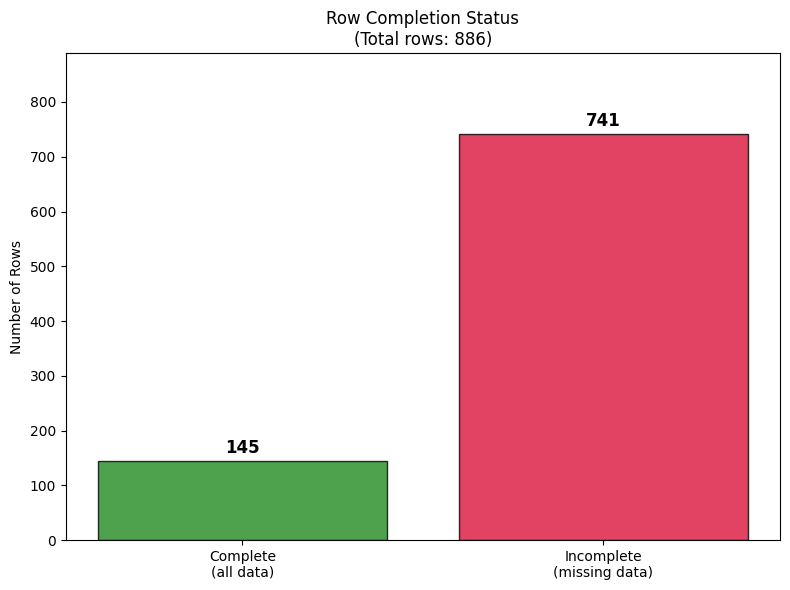

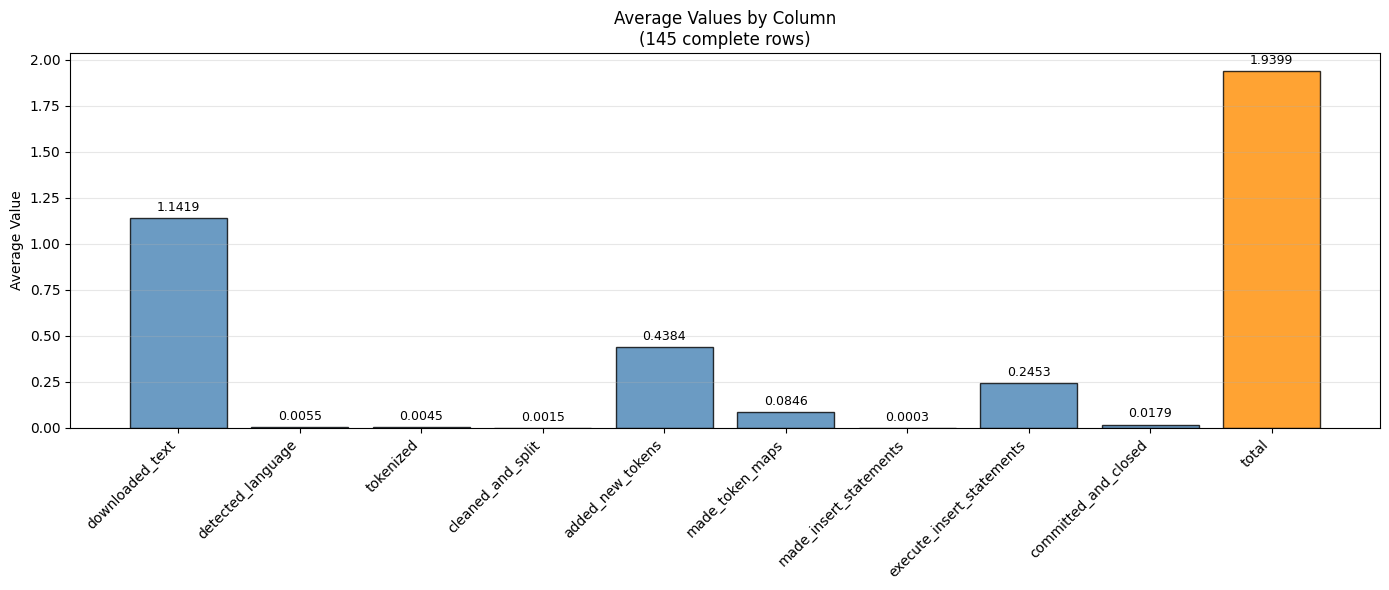


Averages (145 complete rows):
  downloaded_text: 1.1419
  detected_language: 0.0055
  tokenized: 0.0045
  cleaned_and_split: 0.0015
  added_new_tokens: 0.4384
  made_token_maps: 0.0846
  made_insert_statements: 0.0003
  execute_insert_statements: 0.2453
  committed_and_closed: 0.0179
  total: 1.9399 <-- sum


In [12]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np


COLUMNS = [
    "url",
    "downloaded_text",
    "detected_language",
    "tokenized",
    "cleaned_and_split",
    "added_new_tokens",
    "made_token_maps",
    "made_insert_statements",
    "execute_insert_statements",
    "committed_and_closed",
    "total"
]

NUMERIC_COLS = COLUMNS[1:-1]  # exclude url and total
FILENAME = "timing.csv"


def read_all():
    """Read all rows from CSV."""
    if not os.path.exists(FILENAME):
        return []
    with open(FILENAME, 'r', newline='', encoding='utf-8') as f:
        reader = csv.DictReader(f)
        return list(reader)


def write_all(rows):
    """Write all rows to CSV."""
    with open(FILENAME, 'w', newline='', encoding='utf-8') as f:
        writer = csv.DictWriter(f, fieldnames=COLUMNS)
        writer.writeheader()
        writer.writerows(rows)


def to_float(value):
    """Convert string value to float."""
    try:
        return float(value)
    except (ValueError, TypeError):
        return 0.0


def has_all_data_except_total(row):
    """Check if all numeric columns (except total) have non-empty data."""
    for col in NUMERIC_COLS:
        if row.get(col, "").strip() == "":
            return False
    return True


def calculate_total(row):
    """Sum all numeric columns except url and total."""
    return sum(to_float(row.get(col, 0)) for col in NUMERIC_COLS)


def update_totals():
    """Calculate and update total for all rows with complete data."""
    rows = read_all()
    updated_count = 0

    for row in rows:
        if has_all_data_except_total(row):
            row["total"] = calculate_total(row)
            updated_count += 1

    write_all(rows)
    return updated_count, len(rows)


def get_row_status_counts():
    """Count complete vs incomplete rows."""
    rows = read_all()
    complete = sum(1 for row in rows if has_all_data_except_total(row))
    incomplete = len(rows) - complete
    return complete, incomplete, len(rows)


def plot_completion_status():
    """Bar graph of complete vs incomplete rows."""
    complete, incomplete, total = get_row_status_counts()

    fig, ax = plt.subplots(figsize=(8, 6))

    categories = ['Complete\n(all data)', 'Incomplete\n(missing data)']
    counts = [complete, incomplete]
    colors = ['forestgreen', 'crimson']

    bars = ax.bar(categories, counts, color=colors, edgecolor='black', alpha=0.8)

    ax.set_ylabel('Number of Rows')
    ax.set_title(f'Row Completion Status\n(Total rows: {total})')
    ax.set_ylim(0, max(counts) * 1.2 if counts else 1)

    # Add value labels
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()

    """
    print(f"\nComplete rows: {complete}")
    print(f"Incomplete rows: {incomplete}")
    print(f"Total rows: {total}")
    """


def plot_averages():
    """Bar plot of column averages for complete rows."""
    rows = read_all()
    complete_rows = [row for row in rows if has_all_data_except_total(row)]

    if not complete_rows:
        print("No complete rows found.")
        return

    # Calculate averages
    all_numeric_cols = NUMERIC_COLS + ["total"]
    averages = {}
    for col in all_numeric_cols:
        values = [to_float(row.get(col, 0)) for row in complete_rows]
        averages[col] = np.mean(values)

    # Create figure
    fig, ax = plt.subplots(figsize=(14, 6))

    labels = list(averages.keys())
    values = list(averages.values())

    # Color total differently
    colors = ['steelblue'] * len(NUMERIC_COLS) + ['darkorange']

    bars = ax.bar(range(len(labels)), values, color=colors, edgecolor='black', alpha=0.8)

    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_ylabel('Average Value')
    ax.set_title(f'Average Values by Column\n({len(complete_rows)} complete rows)')
    ax.grid(axis='y', alpha=0.3)

    # Add value labels
    for bar, val in zip(bars, values):
        height = bar.get_height()
        ax.annotate(f'{val:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

    
    print(f"\nAverages ({len(complete_rows)} complete rows):")
    for col, avg in averages.items():
        marker = " <-- sum" if col == "total" else ""
        print(f"  {col}: {avg:.4f}{marker}")
    


update_totals()
plot_completion_status()
plot_averages()
